In [5]:
import cv2
import mediapipe as mp
import random

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Game constants
WINDOW_WIDTH = 640
WINDOW_HEIGHT = 480
PADDLE_WIDTH = 10
PADDLE_HEIGHT = 60
BALL_RADIUS = 10

# Initialize the game window
window = cv2.namedWindow("Ping Pong Game", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Ping Pong Game", WINDOW_WIDTH, WINDOW_HEIGHT)

cap = cv2.VideoCapture(0)
hands = mp_hands.Hands()

# Initialize player paddle and computer paddle positions
player_paddle_y = WINDOW_HEIGHT // 2 - PADDLE_HEIGHT // 2
computer_paddle_y = WINDOW_HEIGHT // 2 - PADDLE_HEIGHT // 2

# Initialize ball position and movement
ball_x = WINDOW_WIDTH // 2
ball_y = WINDOW_HEIGHT // 2
ball_speed_x = 8
ball_speed_y = 8

score_player = 0
score_computer = 0

while True:
    success, image = cap.read()

    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        num_hands = len(results.multi_hand_landmarks)
        if num_hands >= 1:
            player_landmarks = results.multi_hand_landmarks[0]

            # Get index finger tip coordinates
            index_finger_x = int(player_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * WINDOW_WIDTH)
            index_finger_y = int(player_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * WINDOW_HEIGHT)

            # Move player paddle based on index finger position
            player_paddle_y = index_finger_y - PADDLE_HEIGHT // 2

    # Update ball position
    ball_x += ball_speed_x
    ball_y += ball_speed_y

    # Check collision with player paddle
    if (
        ball_x <= PADDLE_WIDTH and
        player_paddle_y <= ball_y <= player_paddle_y + PADDLE_HEIGHT
    ):
        ball_speed_x *= -1
        score_player += 1

    # Check collision with computer paddle
    if (
        ball_x >= WINDOW_WIDTH - PADDLE_WIDTH - BALL_RADIUS and
        computer_paddle_y <= ball_y <= computer_paddle_y + PADDLE_HEIGHT
    ):
        ball_speed_x *= -1
        score_computer += 1

    # Check collision with top or bottom wall
    if ball_y <= 0 or ball_y >= WINDOW_HEIGHT - BALL_RADIUS:
        ball_speed_y *= -1

    # Update computer paddle position based on ball position
    if ball_y < computer_paddle_y + PADDLE_HEIGHT // 2:
        computer_paddle_y -= 5
    elif ball_y > computer_paddle_y + PADDLE_HEIGHT // 2:
        computer_paddle_y += 5

    # Draw player paddle
    cv2.rectangle(image, (PADDLE_WIDTH, player_paddle_y), (2 * PADDLE_WIDTH, player_paddle_y + PADDLE_HEIGHT), (0, 255, 0), cv2.FILLED)

    # Draw computer paddle
    cv2.rectangle(image, (WINDOW_WIDTH - 2 * PADDLE_WIDTH, computer_paddle_y), (WINDOW_WIDTH - PADDLE_WIDTH, computer_paddle_y + PADDLE_HEIGHT), (0, 0, 255), cv2.FILLED)

    # Draw ball
    cv2.circle(image, (ball_x, ball_y), BALL_RADIUS, (255, 0, 0), cv2.FILLED)

    # Draw scores
    cv2.putText(image, f"Player Score: {score_player}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(image, f"Computer Score: {score_computer}", (WINDOW_WIDTH - 300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow("Ping Pong Game", image)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


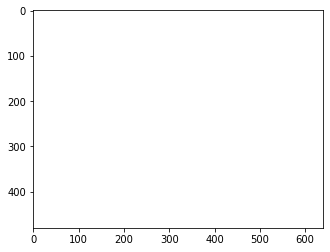

In [13]:
import numpy as np
width = 640
height = 480
# print(255 * np.ones((height, width, 3), dtype=np.uint8))
import matplotlib.pyplot as plt
plt.imshow(255 * np.ones((height, width, 3), dtype=np.uint8))

In [18]:
len(np.ones((height, width, 3), dtype=np.uint8))


480

In [4]:
# creating a board
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Initialize OpenCV and Mediapipe
cap = cv2.VideoCapture(0)
hands = mp_hands.Hands()

# Set up the screen
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Board properties
board = 255 * np.ones((height, width, 3), dtype=np.uint8)
brush_radius = 10
brush_color = (0, 0, 0)

while True:
    success, image = cap.read()

    # Flip the image horizontally for natural hand movements
    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process hand landmarks
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Get index finger tip coordinates
            index_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width)
            index_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)

            # Get middle finger tip coordinates
            middle_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * width)
            middle_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * height)

            # Check if fingers are up (when the y-coordinate is below a threshold)
            if index_finger_y < height // 2:
                # Set brush color based on middle finger position
                if middle_finger_x < width // 3:
                    brush_color = (0, 0, 255)  # Blue
                elif middle_finger_x < 2 * width // 3:
                    brush_color = (0, 255, 0)  # Green
                else:
                    brush_color = (255, 0, 0)  # Red

                # Draw brush stroke on the board
                cv2.circle(board, (index_finger_x, index_finger_y), brush_radius, brush_color, -1)

    # Display the board and the video feed
    cv2.imshow('Board', board)
    cv2.imshow('Video Feed', image)

    # Clear the board if 'c' is pressed
    if cv2.waitKey(1) & 0xFF == ord('c'):
        board = 255 * np.ones((height, width, 3), dtype=np.uint8)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()


In [5]:
# this is fireworks
import cv2
import mediapipe as mp
import random

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Initialize OpenCV and Mediapipe
cap = cv2.VideoCapture(0)
hands = mp_hands.Hands()

# Set up the screen
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Firework properties
firework_radius = 5
firework_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]
fireworks = []

while True:
    success, image = cap.read()

    # Flip the image horizontally for natural hand movements
    image = cv2.flip(image, 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process hand landmarks
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Get index finger tip coordinates
            index_finger_x = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * width)
            index_finger_y = int(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * height)

            # Check if finger is up (when the y-coordinate is below a threshold)
            # if index_finger_y < height // 2:
                # Create a new firework at the finger position
            firework = {
                "position": [index_finger_x, index_finger_y],
                "color": random.choice(firework_colors),
                "life": random.randint(50, 100)
            }
            fireworks.append(firework)

    # Update and draw fireworks
    for firework in fireworks:
        firework["life"] -= 1

        if firework["life"] <= 0:
            fireworks.remove(firework)
        else:
            # Draw firework
            cv2.circle(image, (firework["position"][0], firework["position"][1]), firework_radius, firework["color"], -1)

    # Display the image
    cv2.imshow('Fireworks Art', image)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()
